In [9]:
import tensorflow as tf

import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
# Definieren des Modells
model = ResNet50(weights='imagenet')

In [12]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [13]:
# Image path
file = 'vogel.jpg'
img_file = os.path.join(file)
print(img_file)

# Loading the image, and resizing it to default size
img = image.load_img(img_file, target_size=(224, 224))

# Converting the image to a Numpy array
x = image.img_to_array(img)

print(x.shape)
print(x)

vogel.jpg
(224, 224, 3)
[[[139. 129. 104.]
  [129. 123.  89.]
  [124. 118.  84.]
  ...
  [169. 135. 107.]
  [167. 142. 111.]
  [172. 155. 137.]]

 [[159. 141. 119.]
  [154. 140. 113.]
  [145. 131. 104.]
  ...
  [175. 140. 112.]
  [166. 129. 102.]
  [165. 139. 114.]]

 [[184. 163. 142.]
  [172. 152. 128.]
  [164. 148. 122.]
  ...
  [170. 137. 106.]
  [165. 130. 108.]
  [158. 127.  99.]]

 ...

 [[ 41.  43.  29.]
  [ 95. 101.  91.]
  [ 97. 104.  86.]
  ...
  [148. 156. 132.]
  [144. 152. 128.]
  [134. 144. 120.]]

 [[ 44.  48.  34.]
  [102. 109.  91.]
  [ 91.  99.  75.]
  ...
  [161. 171. 147.]
  [150. 161. 131.]
  [147. 161. 136.]]

 [[ 68.  72.  58.]
  [ 95. 102.  84.]
  [ 87.  95.  71.]
  ...
  [167. 177. 153.]
  [148. 159. 129.]
  [128. 142. 117.]]]


In [14]:
# Adding extra dimension
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [15]:
# Scaling the image
x = preprocess_input(x)
#result = np.squeeze(x, axis=0)
#print(result.shape)
print(x.shape)
print(x)

(1, 224, 224, 3)
[[[[ 6.0997009e-02  1.2221001e+01  1.5320000e+01]
   [-1.4939003e+01  6.2210007e+00  5.3199997e+00]
   [-1.9939003e+01  1.2210007e+00  3.1999969e-01]
   ...
   [ 3.0609970e+00  1.8221001e+01  4.5320000e+01]
   [ 7.0609970e+00  2.5221001e+01  4.3320000e+01]
   [ 3.3060997e+01  3.8221001e+01  4.8320000e+01]]

  [[ 1.5060997e+01  2.4221001e+01  3.5320000e+01]
   [ 9.0609970e+00  2.3221001e+01  3.0320000e+01]
   [ 6.0997009e-02  1.4221001e+01  2.1320000e+01]
   ...
   [ 8.0609970e+00  2.3221001e+01  5.1320000e+01]
   [-1.9390030e+00  1.2221001e+01  4.2320000e+01]
   [ 1.0060997e+01  2.2221001e+01  4.1320000e+01]]

  [[ 3.8060997e+01  4.6221001e+01  6.0320000e+01]
   [ 2.4060997e+01  3.5221001e+01  4.8320000e+01]
   [ 1.8060997e+01  3.1221001e+01  4.0320000e+01]
   ...
   [ 2.0609970e+00  2.0221001e+01  4.6320000e+01]
   [ 4.0609970e+00  1.3221001e+01  4.1320000e+01]
   [-4.9390030e+00  1.0221001e+01  3.4320000e+01]]

  ...

  [[-7.4939003e+01 -7.3778999e+01 -8.2680000e+01]

In [16]:
prediction = model.predict(x)

decoded = decode_predictions(prediction, top=3)[0]
print(decoded)

[('n01530575', 'brambling', 0.9872773), ('n01558993', 'robin', 0.0048426134), ('n02025239', 'ruddy_turnstone', 0.0015754083)]


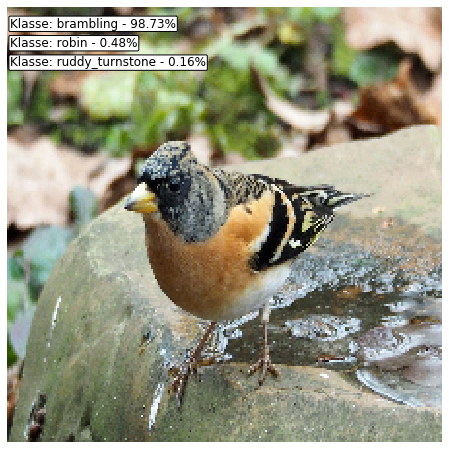

In [17]:
plt.figure(figsize=(8, 8))

pos_x, pos_y = 1,10
for id, lab, prob in decoded:
    plt.text(pos_x, pos_y, 'Klasse: {} - {:.2f}%'.format(lab,prob*100),
            fontsize=12, color='black',
            bbox=dict(boxstyle="round", pad=0.1, fc='white'))
    pos_y += 10

plt.axis('off')
plt.imshow(img)